### Exercise 1

<div class="alert-success">
    
1. **Use two maps of points.**

2. **Compute the distance matrix for both maps.**

3. **Select one row of the distance matrix, and plot the two points with the minimal distance on top of the country of your choosing.**
</div>

In [4]:
from  fiona import listlayers
import os

argentinaMaps=os.path.join('maps','argentina22171','argentinaMaps22171_all3.gpkg')

#layers in maps
listlayers(argentinaMaps)

['country',
 'cities',
 'rivers',
 'states',
 'municipalities',
 'border',
 'airports']

In [19]:
# reading in the data:
import os
import geopandas as gpd

country=gpd.read_file(argentinaMaps,layer='country')
states=gpd.read_file(argentinaMaps,layer='states')
municipalities=gpd.read_file(argentinaMaps,layer='municipalities')
airports=gpd.read_file(argentinaMaps,layer='airports')
rivers=gpd.read_file(argentinaMaps,layer='rivers')
border=gpd.read_file(argentinaMaps,layer='border')

In [6]:
medium_airport=airports[airports['type']=='medium_airport'] #can't use "airports.type"
medium_airport.reset_index(drop=True, inplace=True)
medium_airport

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
0,Malvinas Argentinas Airport,medium_airport,-54.843300,-68.295800,102.0,Tierra del Fuego Province,Ushuaia,POINT (1737945.839 3915824.327)
1,El Calafate - Commander Armando Tola Internati...,medium_airport,-50.280300,-72.053101,669.0,Santa Cruz Province,El Calafate,POINT (1496258.115 4429856.907)
2,Cataratas Del Iguazú International Airport,medium_airport,-25.737301,-54.473400,916.0,Misiones Province,Puerto Iguazu,POINT (3275864.379 7033639.587)
3,El Plumerillo Airport,medium_airport,-32.831699,-68.792900,2310.0,Mendoza Province,Mendoza,POINT (1800378.820 6363192.739)
4,San Carlos De Bariloche Airport,medium_airport,-41.151199,-71.157501,2774.0,Río Negro Province,San Carlos de Bariloche,POINT (1570761.950 5444147.406)
...,...,...,...,...,...,...,...,...
63,Orán Airport,medium_airport,-23.152800,-64.329201,1171.0,Salta Province,Orán,POINT (2287195.989 7419561.720)
64,Rincon De Los Sauces Airport,medium_airport,-37.390598,-68.904198,1968.0,Neuquén Province,Rincon de los Sauces,POINT (1774214.302 5857484.503)
65,Tres Arroyos Airport,medium_airport,-38.386900,-60.329700,400.0,Buenos Aires Province,Tres Arroyos,POINT (2521222.679 5686315.521)
66,Villa Dolores Airport,medium_airport,-31.945200,-65.146301,1847.0,Córdoba Province,Villa Dolores,POINT (2148716.857 6445469.683)


In [7]:
import pandas as pd 


portsFile=os.path.join('data','UpdatedPub150.csv')

infoseaports=pd.read_csv(portsFile)
#columns available (so many)
#infoseaports.columns.to_list()

['World Port Index Number',
 'Region Name',
 'Main Port Name',
 'Alternate Port Name',
 'UN/LOCODE',
 'Country Code',
 'World Water Body',
 'Sailing Direction or Publication',
 'Publication Link',
 'Standard Nautical Chart',
 'IHO S-57 Electronic Navigational Chart',
 'IHO S-101 Electronic Navigational Chart',
 'Digital Nautical Chart',
 'Tidal Range (m)',
 'Entrance Width (m)',
 'Channel Depth (m)',
 'Anchorage Depth (m)',
 'Cargo Pier Depth (m)',
 'Oil Terminal Depth (m)',
 'Liquified Natural Gas Terminal Depth (m)',
 'Maximum Vessel Length (m)',
 'Maximum Vessel Beam (m)',
 'Maximum Vessel Draft (m)',
 'Offshore Maximum Vessel Length (m)',
 'Offshore Maximum Vessel Beam (m)',
 'Offshore Maximum Vessel Draft (m)',
 'Harbor Size',
 'Harbor Type',
 'Harbor Use',
 'Shelter Afforded',
 'Entrance Restriction - Tide',
 'Entrance Restriction - Heavy Swell',
 'Entrance Restriction - Ice',
 'Entrance Restriction - Other',
 'Overhead Limits',
 'Underkeel Clearance Management System',
 'Good Ho

In [8]:
#rename
infoseaports.rename(columns={'Main Port Name':'portName'},inplace=True)
#subset
infoseaports=infoseaports.loc[:,['portName', 'Country Code','Latitude', 'Longitude']]

# we have now
infoseaports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3824 entries, 0 to 3823
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   portName      3824 non-null   object 
 1   Country Code  3824 non-null   object 
 2   Latitude      3824 non-null   float64
 3   Longitude     3824 non-null   float64
dtypes: float64(2), object(2)
memory usage: 119.6+ KB


In [9]:
#primero creo los puntos espaciales no proyectados
#1.spatial points (unprojected)
seaports=gpd.GeoDataFrame(data=infoseaports.copy(),
                           geometry=gpd.points_from_xy(infoseaports.Longitude,
                                                       infoseaports.Latitude), 
                          crs=4326)# notice it is unprojected

#2. subset: SUBSET
seaports_arg=seaports[seaports['Country Code']=='Argentina'].copy()

#3. reset indexes
seaports_arg.reset_index(drop=True, inplace=True)

#4. reprojecting
seaports_arg_22171=seaports_arg.to_crs(22171) # projected crs

<Axes: >

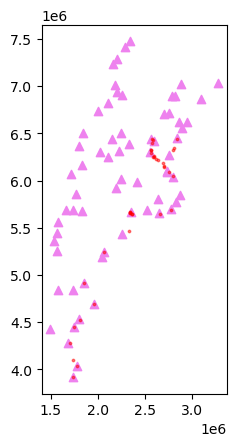

In [12]:
base=medium_airport.plot(color='violet',marker="^")
seaports_arg_22171.plot(ax=base,alpha=0.5,markersize=3, color='red')

In [13]:
distanceMatrixKM_sea_air=seaports_arg_22171.set_index('portName').geometry.apply\
(lambda g: medium_airport.set_index('name').geometry.distance(g)/1000)


distanceMatrixKM_sea_air

name,Malvinas Argentinas Airport,El Calafate - Commander Armando Tola International Airport,Cataratas Del Iguazú International Airport,El Plumerillo Airport,San Carlos De Bariloche Airport,Martin Miguel De Guemes International Airport,San Fernando Airport,Ingeniero Ambrosio Taravella Airport,Piloto Civil N. Fernández Airport,Rosario Islas Malvinas International Airport,...,Curuzu Cuatia Airport,El Bolson Airport,General Pico Airport,Comodoro D.R. Salomón Airport,Monte Caseros Airport,Orán Airport,Rincon De Los Sauces Airport,Tres Arroyos Airport,Villa Dolores Airport,Zapala Airport
portName,,,,,,,,,,,,,,,,,,,,,
Puerto Madryn,1366.768528,994.191258,2159.831180,1153.656826,539.074816,1996.345374,1090.575006,1278.736970,1036.717924,1165.981732,...,1592.868937,543.767358,796.764722,899.199716,1554.131852,2188.770081,683.403330,633.337147,1206.456824,601.311910
Mar Del Plata,2054.612633,1794.438217,1434.074102,1182.779176,1227.473518,1662.895179,416.265822,975.066140,1781.893607,651.609269,...,937.050878,1278.844060,620.297651,1119.307581,879.768704,1796.055276,1012.894985,252.067037,979.788762,1109.760669
La Plata,2385.171695,2079.731537,1091.321939,1042.467234,1368.259372,1342.802056,78.723602,716.224035,2093.239853,349.103570,...,573.640871,1437.366160,550.142140,1075.771914,517.527051,1457.602267,1040.240485,458.557642,756.508828,1190.966858
Buenos Aires,2396.589667,2080.069807,1081.452932,993.817428,1346.791934,1294.948065,26.568246,663.918186,2099.633934,297.295530,...,548.032388,1418.029008,512.442635,1034.732773,495.156508,1413.139571,1006.825952,462.925585,704.625600,1162.817483
Puerto Rosales,1837.119805,1491.006756,1663.402582,912.912221,816.189265,1605.170840,594.118310,873.206311,1523.219804,686.531730,...,1100.162490,872.027636,392.273939,770.597121,1059.246070,1777.513019,625.665842,164.653499,829.769987,699.873759
Puerto Deseado,807.817097,531.014895,2686.226986,1677.269807,844.529900,2550.650455,1612.521231,1837.639600,495.425200,1716.428259,...,2131.866905,784.155053,1356.501651,1396.780116,2088.626472,2746.163573,1178.514837,1141.969495,1762.609299,1033.724559
Puerto Belgrano,1841.882928,1494.478742,1659.748797,906.865784,815.432669,1599.043028,591.012415,867.063308,1527.486119,681.518095,...,1095.972519,871.828132,385.974916,765.443554,1055.288268,1771.536433,621.521062,165.457255,823.493153,697.269847
Puerto Santa Cruz,537.749850,254.464856,2997.797931,1910.419697,1006.717176,2812.471738,1923.983642,2113.503116,185.964974,2016.465243,...,2438.734597,927.255317,1642.157728,1616.600788,2397.220635,3014.434457,1404.252480,1454.415268,2031.606711,1233.933296
Comodoro Rivadavia,1001.386794,598.127468,2556.225321,1453.414784,603.046933,2345.445906,1486.193698,1645.005565,653.444485,1558.726390,...,1988.656197,544.748712,1176.085558,1166.558788,1950.410345,2546.332546,949.979432,1024.425800,1563.193951,796.306262


In [14]:
# distance between 'Malvinas Argentinas airport' and 'Ushuaia' in km
#elijo una fila, calculé las misnimas distancias y verifiqué que es un valor único 
distancia2puntos=medium_airport.iloc[0].geometry.distance(seaports_arg_22171.iloc[18].geometry)/1000
distancia2puntos

3.044312931155478

In [118]:
centroArgentina=country.centroid

In [119]:
centroidX=centroArgentina.x[0]
centroidY=centroArgentina.y[0]

In [120]:
punto1=medium_airport[medium_airport.name=='Malvinas Argentinas Airport'].cx[:centroidX,centroidY:]

In [121]:
punto2=seaports_arg_22171[seaports_arg_22171.portName=='Ushuaia'].cx[centroidX:,centroidY:]

In [122]:
coordenadasPunto1=seaports_arg_22171.iloc[0]['geometry'].coords[:]

In [127]:
coordenadasPunto2=medium_airport.iloc[18]['geometry'].coords[:]

In [134]:
base = country.explore(color='violet',zoom_start=4)
punto1.explore(m=base,color='red',marker_kwds=dict(radius=10))
punto2.explore(m=base,color='green',marker_kwds=dict(radius=10))

### Exercise 2

<div class="alert-success">
    
1. Use **a map of points** and a **map of lines**. RIOS Y aeropuertos

2. Compute the **distance matrix for both maps**.

3. **Select one line of the distance matrix**, and **plot the closests and the farthest point to that line**.
    
    
</div>

In [71]:
selectRiver=rivers[rivers.NAME.str.contains('Parana')]

In [72]:
distanceMatrixKM_riv_air=rivers.set_index('NAME').geometry.apply\
(lambda g: medium_airport.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)


In [73]:
systems=rivers.dissolve(by='SYSTEM')

In [74]:
systems.reset_index(drop=False,inplace=True)
systems.drop(columns='NAME',inplace=True)

In [75]:
distanceMatrixKM_sys_air=systems.set_index('SYSTEM').geometry.apply\
(lambda g: medium_airport.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sys_air

name,Aeropuerto Nacional de Formosa,Almirante Marco Andres Zar Airport,Area De Material Airport,Aviador C. Campos Airport,Brigadier Antonio Parodi Airport,Brigadier Mayor D Cesar Raul Ojeda Airport,Capitan D Daniel Vazquez Airport,Capitan V A Almonacid Airport,Catamarca Airport,Cataratas Del Iguazú International Airport,...,Suboficial Ay Santiago Germano Airport,Teniente Benjamin Matienzo Airport,Termas de Río Hondo international Airport,Tres Arroyos Airport,Vicecomodoro Angel D. La Paz Aragonés Airport,Villa Dolores Airport,Villa Gesell Airport,Villa Reynolds Airport,Zapala Airport,Ástor Piazzola International Airport
SYSTEM,,,,,,,,,,,,,,,,,,,,,
Parana,119.884028,1192.210378,357.38828,1248.443876,1454.725468,554.602025,1889.823063,666.263284,620.609233,10.152287,...,770.811267,635.468721,589.284828,535.858692,520.414555,440.707637,402.1483,476.424402,1106.447351,465.674227


In [77]:
base=medium_airport.explore(color='violet',marker_kwds=dict(radius=10))
rivers[rivers.NAME.str.contains('Parana')].explore(m=base)

In [36]:
mins=distanceMatrixKM_sys_air.idxmin(axis='columns') # same as axis=1
mins

SYSTEM
Parana    General Urquiza Airport
dtype: object

In [37]:
maxs=distanceMatrixKM_sys_air.idxmax(axis='columns') # same as axis=1
maxs

SYSTEM
Parana    Malvinas Argentinas Airport
dtype: object

In [42]:
base=systems.explore()
# the closest
medium_airport[medium_airport.name.isin(mins)].explore(m=base,color='orange',marker_kwds=dict(radius=10))
# the furthest
medium_airport[medium_airport.name.isin(maxs)].explore(m=base,color='green',marker_kwds=dict(radius=10))


### Exercise 3

<div class="alert-success">
    
1. **Create a set of points and a set of polygons**

2. Compute the **distance matrix for both sets**.

3. Select **one polygon** of the **distance matrix**, and plot the **closest** and the **farthest point to that polygon**.
    
</div>   

In [101]:
centroArgentina=country.centroid
centroArgentina

0    POINT (2166251.918 6144387.372)
dtype: geometry

In [102]:
centroidX=centroArgentina.x[0]
centroidY=centroArgentina.y[0]

In [103]:
municipalities.cx[:centroidX,centroidY:].unary_union
gpd.GeoDataFrame(index=[0],
                 crs=municipalities.crs,
                 geometry=[municipalities.cx[:centroidX,centroidY:].unary_union])

,geometry
0,"POLYGON Z ((1837433.176 5990761.421 0.000, 183..."


In [104]:
municipalities.cx[:centroidX,centroidY:].dissolve()

,geometry,ADM0_ES,ADM0_PCODE,ADM1_ES,ADM1_PCODE,ADM2_ES,ADM2_REF,ADM2_PCODE
0,"POLYGON Z ((1837433.176 5990761.421 0.000, 183...",Argentina,AR,La Rioja,AR046,Arauco,Arauco,AR046007


In [105]:
# you create
Argentina_topLeft=municipalities.cx[:centroidX,centroidY:].dissolve()

In [106]:
Argentina_topLeft['zone']='NW' # add column
Argentina_topLeft=Argentina_topLeft.loc[:,['ADM0_ES','zone','geometry']] 

In [107]:
Argentina_bottomRight=municipalities.cx[centroidX:,:centroidY].dissolve()
Argentina_bottomRight['zone']='NE'
Argentina_bottomRight=Argentina_bottomRight.loc[:,['ADM0_ES','zone','geometry']]

In [108]:
uniondf=Argentina_topLeft.overlay(Argentina_bottomRight,how="union",keep_geom_type=True)

In [109]:
uniondf1=pd.concat([Argentina_topLeft,Argentina_bottomRight],ignore_index=True)
uniondf1

,ADM0_ES,zone,geometry
0,Argentina,NW,"POLYGON Z ((1837433.176 5990761.421 0.000, 183..."
1,Argentina,NE,MULTIPOLYGON Z (((2115965.610 5276726.679 0.00...


In [110]:
Argentina_topLeft_hull= gpd.GeoDataFrame(index=[0],
                                    crs=municipalities.crs,
                                    geometry=[Argentina_topLeft.unary_union.convex_hull])

In [111]:
Argentina_bottomRight_hull= gpd.GeoDataFrame(index=[0],
                                    crs=municipalities.crs,
                                    geometry=[Argentina_bottomRight.unary_union.convex_hull])

<Axes: >

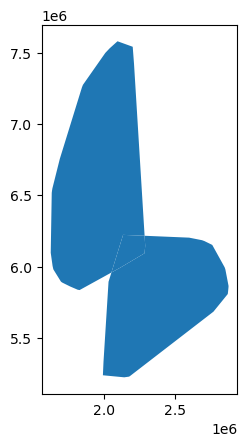

In [112]:
Argentina_topLeft_hull.overlay(Argentina_bottomRight_hull, how='union').plot()

In [58]:
unionHulls=Argentina_topLeft_hull.overlay(Argentina_bottomRight_hull, how='union')

In [113]:
distanceMatrixKM_sysHull_air=uniondf1.set_index('zone').geometry.apply\
(lambda g: medium_airport.set_index('name').geometry.distance(g)/1000).\
sort_index(axis=0).sort_index(axis=1)

distanceMatrixKM_sysHull_air

name,Aeropuerto Nacional de Formosa,Almirante Marco Andres Zar Airport,Area De Material Airport,Aviador C. Campos Airport,Brigadier Antonio Parodi Airport,Brigadier Mayor D Cesar Raul Ojeda Airport,Capitan D Daniel Vazquez Airport,Capitan V A Almonacid Airport,Catamarca Airport,Cataratas Del Iguazú International Airport,...,Suboficial Ay Santiago Germano Airport,Teniente Benjamin Matienzo Airport,Termas de Río Hondo international Airport,Tres Arroyos Airport,Vicecomodoro Angel D. La Paz Aragonés Airport,Villa Dolores Airport,Villa Gesell Airport,Villa Reynolds Airport,Zapala Airport,Ástor Piazzola International Airport
zone,,,,,,,,,,,,,,,,,,,,,
NE,864.040466,40.588304,120.388629,484.340448,424.952754,137.828545,732.106700,533.019477,599.531811,1020.471661,...,302.299633,792.308372,719.545739,0.00000,694.069802,223.425317,0.000000,35.042115,389.632328,0.000000
NW,668.643776,676.421211,0.000000,350.934955,638.338745,0.000000,1305.448261,0.000000,0.000000,1059.836905,...,0.000000,8.008485,3.333550,469.26141,67.164601,0.000000,632.299642,0.000000,202.843698,622.279705


In [114]:
mins=distanceMatrixKM_sysHull_air.idxmin(axis="columns")
mins

zone
NE    Comandante Espora Airport
NW     Area De Material Airport
dtype: object

In [115]:
maxs=distanceMatrixKM_sysHull_air.idxmax(axis='columns') # same as axis=1
maxs

zone
NE    Malvinas Argentinas Airport
NW    Malvinas Argentinas Airport
dtype: object

In [116]:
base=unionHulls.explore()#qué tan distante está del poligono
                            
medium_airport[medium_airport.name.isin(mins)].explore(m=base,color='orange',marker_kwds=dict(radius=10))
medium_airport[medium_airport.name.isin(maxs)].explore(m=base,color='blue',marker_kwds=dict(radius=10))

### Exercise 4

<div class="alert-success">
    
1. Create a **set of points** and a **set of lines**

2. Get the **buffer for the lines**, **select different values for the distance**.

3. **Keep the points** that are **within the buffer** (as in point 2, you **need to play with different distances until you show something interesting.  
    
</div>   

In [78]:
distanceMatrixKM_riv_air

name,Aeropuerto Nacional de Formosa,Almirante Marco Andres Zar Airport,Area De Material Airport,Aviador C. Campos Airport,Brigadier Antonio Parodi Airport,Brigadier Mayor D Cesar Raul Ojeda Airport,Capitan D Daniel Vazquez Airport,Capitan V A Almonacid Airport,Catamarca Airport,Cataratas Del Iguazú International Airport,...,Suboficial Ay Santiago Germano Airport,Teniente Benjamin Matienzo Airport,Termas de Río Hondo international Airport,Tres Arroyos Airport,Vicecomodoro Angel D. La Paz Aragonés Airport,Villa Dolores Airport,Villa Gesell Airport,Villa Reynolds Airport,Zapala Airport,Ástor Piazzola International Airport
NAME,,,,,,,,,,,,,,,,,,,,,
Paraguay,124.351342,1890.394121,860.036125,1849.843875,2091.627722,1016.722077,2595.151198,855.930755,737.961462,448.208906,...,1256.193858,666.860022,646.484396,1263.196451,585.437838,835.453242,1134.770562,984.547023,1700.426548,1207.400108
Parana,119.884028,1192.210378,357.388280,1248.443876,1454.725468,554.602025,1889.823063,666.263284,620.609233,10.152287,...,770.811267,635.468721,589.284828,535.858692,520.414555,440.707637,402.148300,476.424402,1106.447351,465.674227


In [79]:
# getting a value (it can be any value)
distanceMatrixKM_riv_air.loc['Parana'].min()

2.523110472716507

In [80]:
minMts=distanceMatrixKM_riv_air.loc['Parana'].min()*1000

#the buffer is a polygon:
rivers[rivers.NAME=='Parana'].buffer(distance = minMts)

0    MULTIPOLYGON (((3141293.393 6859022.441, 31592...
dtype: geometry

In [85]:
bufferAroundParana=rivers[rivers.NAME=='Parana'].buffer(distance = minMts)
bufferAsBase=bufferAroundParana.explore(color='orange')
rivers[rivers.NAME=='Parana'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})

In [135]:
#set of points
small_airports=airports[airports['type']=='small_airport']

# plotting
#rivers[rivers.NAME=='Parana'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
#small_airports.explore(m=bufferAsBase,color='black')
#vemos que algunos pequeños aeropuertos caen dentro del buffer

In [136]:
riversWithinBuffer=small_airports.clip(mask=bufferAroundParana)

riversWithinBuffer

,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
678,San Benito Airport,small_airport,-31.808600,-60.451700,193.0,Entre Ríos Province,San Benito,POINT (2596801.226 6422453.611)
422,Italaviation Airport,small_airport,-29.160800,-59.181400,209.0,Corrientes Province,Goya,POINT (2752587.951 6705727.379)
458,Jardin De América Airport,small_airport,-27.032499,-55.198055,672.0,Misiones Province,Jardin de América,POINT (3181325.897 6896400.136)
453,Itati Airport,small_airport,-27.305297,-58.313924,196.0,Corrientes Province,Itati,POINT (2862239.998 6904794.174)
454,Aeródromo Itatí,small_airport,-27.288045,-58.244662,207.0,Corrientes Province,Itati,POINT (2869428.752 6905957.059)
346,El Dorado Airport,small_airport,-26.397499,-54.574699,685.0,Misiones Province,El Dorado,POINT (3255019.473 6959827.008)


In [88]:
bufferAsBase=bufferAroundParana.explore(color='red')
rivers[rivers.NAME=='Parana'].explore(m=bufferAsBase,color='blue',style_kwds={'weight':0.5})
riversWithinBuffer.explore(m=bufferAsBase,color='black')

In [89]:
# minimum of all the minimum by row
distanceMatrixKM_riv_air.min(axis=1).min()

2.523110472716507

In [93]:
# using the previous value
minMinMts_5=2*distanceMatrixKM_riv_air.min(axis=1).min()*1000
#buffer de todoslos rios

allMinBuffer=rivers.buffer(distance = minMinMts_5).explore(color='orange')#minMinMts_5 esto es una medida técnica que he calculado
rivers.explore(m=allMinBuffer,color='blue',style_kwds={'weight':0.5})

In [95]:
# you see all the buffer polygons: #aqui se ven la cantidad de aeropuertos pequeños en la zona del buffer
riversAll_buf=rivers.buffer(distance = minMinMts_5)


In [96]:
allRiversWithinBuffs=small_airports.clip(riversAll_buf)


,name,type,latitude_deg,longitude_deg,elevation_ft,region_name,municipality,geometry
678,San Benito Airport,small_airport,-31.808600,-60.451700,193.0,Entre Ríos Province,San Benito,POINT (2596801.226 6422453.611)
421,Goya Aeroclub,small_airport,-29.167800,-59.246400,124.0,Corrientes Province,Goya,POINT (2746094.685 6705649.979)
422,Italaviation Airport,small_airport,-29.160800,-59.181400,209.0,Corrientes Province,Goya,POINT (2752587.951 6705727.379)
458,Jardin De América Airport,small_airport,-27.032499,-55.198055,672.0,Misiones Province,Jardin de América,POINT (3181325.897 6896400.136)
453,Itati Airport,small_airport,-27.305297,-58.313924,196.0,Corrientes Province,Itati,POINT (2862239.998 6904794.174)
454,Aeródromo Itatí,small_airport,-27.288045,-58.244662,207.0,Corrientes Province,Itati,POINT (2869428.752 6905957.059)
346,El Dorado Airport,small_airport,-26.397499,-54.574699,685.0,Misiones Province,El Dorado,POINT (3255019.473 6959827.008)


<Axes: >

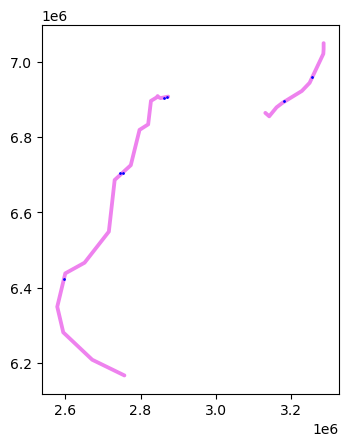

In [97]:
# simple
#base=riversAll_buf.plot(color='violet')
#allRiversWithinBuffs.plot(ax=base, color='blue', markersize=1)

In [98]:
# folium

base=riversAll_buf.explore(color='violet')
allRiversWithinBuffs.explore(m=base, color='blue')